# Crop Yield Prediction using Machine Learning

This project focuses on building a machine learning model to predict crop yield using historical agricultural and climatic data. The objective is to understand how factors such as rainfall, pesticide usage, temperature, crop type, and year influence crop productivity.


## 1. Problem Statement

The objective of this project is to predict crop yield (hg/ha) using historical agricultural and climatic data. Accurate crop yield prediction helps farmers and policymakers make informed decisions regarding resource planning and food security.

This is formulated as a supervised regression problem since the target variable (crop yield) is a continuous numerical value.


**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 2. Dataset Description

The dataset contains historical records of crop yield along with climatic and agricultural factors such as average rainfall, pesticide usage, temperature, crop type, country, and year. These features are used to train a machine learning model that predicts crop yield.


In [2]:
df = pd.read_csv('/content/yield_df.csv')
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## 3. Data Loading and Initial Inspection

In this step, the dataset is loaded and explored to understand its structure, data types, value ranges, and the presence of any missing values. This helps in planning appropriate preprocessing steps.


In [3]:
#This step helps understand feature types, value ranges, and potential missing values.
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


## 4. Handling Missing Values

Missing values can negatively impact model performance. Numerical missing values are handled using mean imputation to preserve the dataset size and maintain statistical consistency.


In [4]:
df.isnull().sum()


,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)


## 5. Encoding Categorical Variables

Machine learning models require numerical input. Categorical variables such as country (Area) and crop type (Item) are converted into numerical format using one-hot encoding.


In [6]:
df_encoded = pd.get_dummies(df, columns=['Area', 'Item'], drop_first=True)

## 6. Feature and Target Selection

The dataset is divided into input features (X) and target variable (y). The target variable is crop yield (hg/ha), while the remaining columns are used as predictive features.


In [7]:
X = df_encoded.drop('hg/ha_yield', axis=1)
y = df_encoded['hg/ha_yield']

## 7. Train-Test Split

The dataset is split into training and testing sets to evaluate the model’s performance on unseen data. 80% of the data is used for training and 20% for testing.



In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8. Feature Scaling

Feature scaling is applied to ensure that all numerical features contribute equally to the model. This is particularly important for linear models that are sensitive to feature magnitude.


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 9. Model 1: Linear Regression

Linear Regression is used as a baseline model to understand the linear relationship between input features and crop yield. It provides simplicity and interpretability.


In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

### Model Evaluation - Linear Regression

The performance of the Linear Regression model is evaluated using MAE, RMSE, and R² score to measure prediction error and goodness of fit.


In [11]:
print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


Linear Regression Results
MAE: 29668.170986368732
RMSE: 42164.84615150055
R2: 0.754900103268989


## 10. Model 2: Random Forest Regressor

Random Forest Regressor is used to capture non-linear relationships and interactions between multiple features. It combines multiple decision trees to improve predictive performance and reduce overfitting.


In [12]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Model Evaluation - Random Forest

The Random Forest model is evaluated using the same metrics to allow a fair comparison with the baseline Linear Regression model.


In [13]:
print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest Results
MAE: 3232.555177907594
RMSE: 8945.378290163999
R2: 0.9889683744901148


## 11. Model Comparison

The performance of both models is compared using RMSE and R² score. A lower RMSE and higher R² indicate better predictive performance.


In [14]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

results

,Model,RMSE,R2 Score
0,Linear Regression,42164.846152,0.754900
1,Random Forest,8945.378290,0.988968


## 12. Feature Importance Analysis

Feature importance analysis helps identify which factors have the greatest influence on crop yield. This improves model interpretability and provides real-world insights.


In [15]:
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

feat_imp

,Feature,Importance
107,Item_Potatoes,0.369278
108,"Item_Rice, paddy",0.074790
3,pesticides_tonnes,0.067307
111,Item_Sweet potatoes,0.065419
46,Area_India,0.056870
4,avg_temp,0.041023
0,Unnamed: 0,0.038409
2,average_rain_fall_mm_per_year,0.036826
105,Item_Maize,0.027034
1,Year,0.022519


##Plot

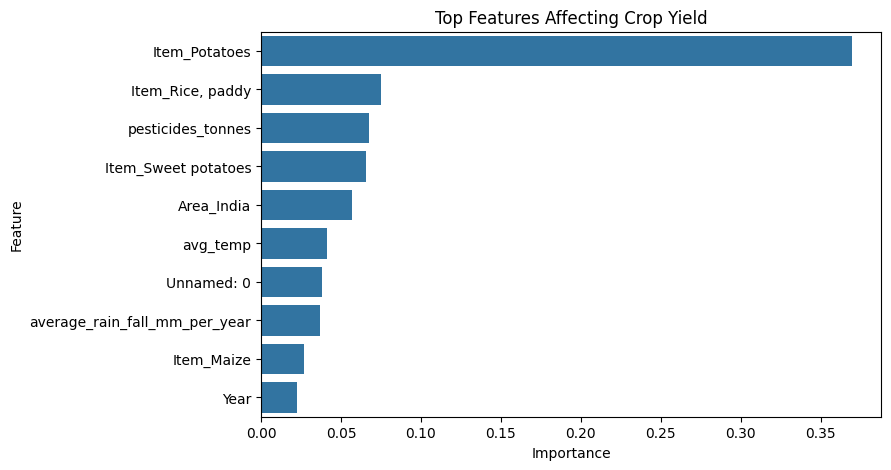

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Top Features Affecting Crop Yield")
plt.show()

## 13. Results Summary

The Random Forest Regressor achieved lower RMSE and higher R² compared to Linear Regression, indicating better performance. Climatic factors such as rainfall and temperature were found to be major contributors to crop yield prediction.


## 14. Conclusion

This project demonstrates the application of supervised machine learning techniques to predict crop yield using real-world agricultural data. Random Forest outperformed Linear Regression by effectively capturing non-linear relationships.

Future improvements could include hyperparameter tuning, adding more environmental features, and deploying the trained model as a REST API for real-time predictions.
